In [184]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, \
accuracy_score, mean_absolute_error, roc_curve,  \
precision_score, roc_auc_score, r2_score, mean_squared_error, \
recall_score, f1_score
import pickle
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

### Machine Learning

What we are going to cover:

0. An end-to-end Scikit-learn workflow
1. Getting the data ready
2. Choose the right estimator/alogrithm for our problems
3. Fit the model and use it to make predictions
4. Evaluate the model
5. Improve the model
6. Save and load a trained model

In [62]:
import sklearn
sklearn.show_versions()


System:
    python: 3.6.9 (default, Nov  7 2019, 10:44:02)  [GCC 8.3.0]
executable: /usr/bin/python3
   machine: Linux-5.3.0-42-generic-x86_64-with-Ubuntu-18.04-bionic

Python deps:
       pip: 9.0.1
setuptools: 46.0.0
   sklearn: 0.21.3
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.1


In [6]:
heart_disease = pd.read_csv("../datasets/original.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
X = heart_disease.drop(["target"], axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
print(clf.get_params())

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)
clf.fit(X_train, y_train)

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
y_preds = clf.predict(X_test)
print(y_preds)

[0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1]


In [47]:
# Evaluate

In [48]:
clf.score(X_train, y_train)

1.0

In [49]:
clf.score(X_test, y_test)

0.8852459016393442

In [50]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        30
           1       0.88      0.90      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.89        61
weighted avg       0.89      0.89      0.89        61



In [51]:
print(confusion_matrix(y_test, y_preds))

[[26  4]
 [ 3 28]]


In [52]:
print(accuracy_score(y_test, y_preds))

0.8852459016393442


In [54]:
# Improve a model
np.random.seed(42)
for i in range(10,100, 10):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    y_preds = clf.predict(X_test)
    print(f"Accuracy of : { accuracy_score(y_test, y_preds):.3f}%",)        

Trying model with 10 estimators
Accuracy of : 0.787%
Trying model with 20 estimators
Accuracy of : 0.852%
Trying model with 30 estimators
Accuracy of : 0.820%
Trying model with 40 estimators
Accuracy of : 0.869%
Trying model with 50 estimators
Accuracy of : 0.836%
Trying model with 60 estimators
Accuracy of : 0.836%
Trying model with 70 estimators
Accuracy of : 0.820%
Trying model with 80 estimators
Accuracy of : 0.869%
Trying model with 90 estimators
Accuracy of : 0.803%


In [ ]:
pickle.dump(clf, open("random_forest_model1.pkl" "wb"))

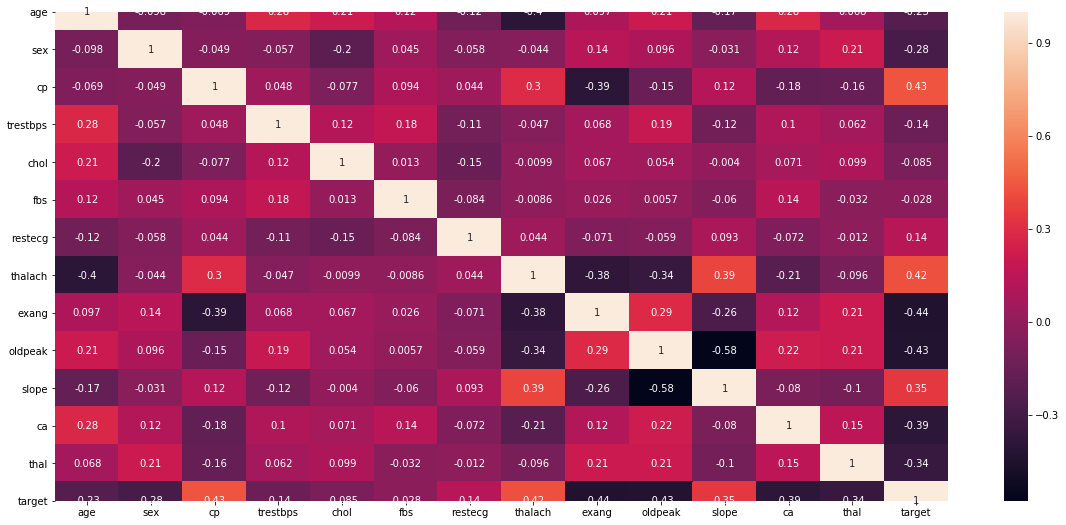

In [70]:
plt.figure(figsize=(20,9))
sns.heatmap(heart_disease.corr(), annot=True)

## Transform data

In [78]:
car_sales = pd.read_csv("../repos/sklearn/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [97]:
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [98]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                               remainder="passthrough")
transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


### One Hot Encoder

Encode categorical features as a on-hot numeric array. . This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

Before we proceed further, could you think of one reason why just label encoding is not sufficient to provide to the model for training? Why do you need one hot encoding?

Problem with label encoding is that it assumes higher the categorical value, better the category.

Let me explain: What this form of organization presupposes is VW > Acura > Honda based on the categorical values. Say supposing your model internally calculates average, then accordingly we get, 1+3 = 4/2 =2. This implies that: Average of VW and Honda is Acura. This is definitely a recipe for disaster. This model’s prediction would have a lot of errors.

This is why we use one hot encoder to perform “binarization” of the category and include it as a feature to train the model.



In [99]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [103]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.3235867221569877

In [104]:
model.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Dealing with missing values 
1. Fill them with some values.
2. Remove the samples with missing data altogether.

In [148]:
car_sales_missing = pd.read_csv("../repos/sklearn/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [149]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [150]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [9]:
### Fill missing data
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), 
                                         inplace=True)
car_sales_missing["Doors"].fillna(car_sales_missing["Doors"].mode()[0], inplace=True)

In [10]:
#Remove columns that have no price, since price is the Y label.
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [11]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [12]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([ ("one_hot", one_hot, categorical_features)],
                                      remainder="passthrough")
trasnformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

NameError: name 'transformed_X' is not defined

In [159]:
### Using Scikit learn to fill missing values

In [13]:
car_sales_missing = pd.read_csv("../repos/sklearn/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [14]:
car_sales_missing.dropna(subset=["Price"], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [17]:
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [18]:
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
     ])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [19]:
car_sales_filled = pd.DataFrame(filled_X,
                               columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [21]:
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([ ("one_hot", one_hot, categorical_features)],
                                      remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [25]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.21990196728583944

## 2. Choose the right algorithm

* Classification - Predicting wheter a sample is one thing or another
* Regression - Predicting a number


In [1]:
### 2.1 Picking a machine learning model for a regression problem

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_df = pd.DataFrame(boston["data"],
                        columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])

In [ ]:
### How many samples?
len(boston_df)

In [ ]:
# Letś try the ridge (folowing the sklearn fluxogram/map)

In [ ]:
from sklearn.linear_model import Ridge

np.random.seed(42)
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = Ridge()
model.fit(X_train, y_train)

model.score(X_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

model.score(X_test, y_test)


### 2.2 Classification Problem

In [36]:
heart_disease = pd.read_csv("../datasets/original.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [37]:
len(heart_disease)

303

In [38]:
from sklearn.svm import LinearSVC

np.random.seed(40)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2)
clf = LinearSVC(max_iter=60000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


/home/serra/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9016393442622951

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
    
np.random.seed(40)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8360655737704918

Tidbit: 

   1. If you have structured data, use ensemble methods 
   2. If you have unstructure data, use deep learning or transfer learning.

In [40]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2


### Make predictions using machine learning model

1. `predict()`
2. `predict_probability()`

In [41]:
labels_pred = None
clf.predict(X_test)

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [42]:
np.array(y_test)

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [43]:
# Comapre predictions

y_preds = clf.predict(X_test)

In [44]:
Counter(y_preds)

Counter({1: 37, 0: 24})

In [45]:
Counter(y_test)

Counter({1: 35, 0: 26})

In [46]:
np.mean(y_preds == y_test)

0.8360655737704918

In [47]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [48]:
#predict_proba() return probability of a classification labels

In [49]:
print(clf.predict_proba(X_test[:5]))
print("------")
print(clf.predict(X_test[:5]))
print(np.array(y_test[:5]))

[[0.32 0.68]
 [0.51 0.49]
 [0.34 0.66]
 [0.74 0.26]
 [0.09 0.91]]
------
[1 0 1 0 1]
[1 1 1 0 1]


Using for the house dataset

In [50]:
X = boston_df.drop("target", axis=1)
y = boston_df["target"]
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2)
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

print("Model has a score of ", model.score(X_test, y_test))

y_preds = model.predict(X_test)
# print(model.predict_proba(X_test[:5]))
print("------")

data_dict = {"y_preds": y_preds, "y_test": y_test}

pred_comparison = pd.DataFrame.from_dict(data_dict)

Model has a score of  0.873969014117403
------


In [51]:
pred_comparison.reset_index(drop=True)
pred_comparison["mean_absolute_error"] = abs(pred_comparison["y_preds"] -
                                            pred_comparison["y_test"])

In [52]:
pred_comparison.mean()

y_preds                21.295265
y_test                 21.488235
mean_absolute_error     2.122637
dtype: float64

In [53]:
mean_absolute_error(y_test, y_preds)

2.1226372549019623

### Evaluating the model

According to the docs in sklearn there __3 different method for evaluating the model__. The estimator score method, the socring parameter and the metric functions.

In [54]:
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.42)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

#Score Method
clf.score(X_test, y_test)


0.8359375

### Score method

In [55]:
clf.score(X_test, y_test)

0.8359375

#### Evaluating using the scoring parameter

Model is trained on 5 different versions of training data, and evaluated on 5 different version of the test data.

In [56]:
cross_val_score(clf, X, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [57]:
print(clf.score(X_test, y_test))
# scoring parameter when set to default (None), 
#uses the default score method from the model
print(np.mean(cross_val_score(clf, X, y, cv=5, scoring=None)))


0.8359375
0.8183606557377049


### Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification Report

In [58]:
cross_val_score_res = cross_val_score(clf, X, y, cv=5, scoring=None)
print (f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score_res) * 100:.2f} %")

Heart Disease Classifier Cross-Validated Accuracy: 81.83 %


**Area under ROC curve**

The ROC curve measures the true positive rate (tpr) vs. the model false positive rate (fpr).

- True positive -> model predicts 1 when truth is 1.
- False Positive -> model predicts 1 when truth is 0.
- True negative -> model predicts 0 when truth is 0.
- False Negative -> model predicts 0 when truth is 1.

In [59]:
y_probs = clf.predict_proba(X_test)
y_probs[:10]

array([[0.91, 0.09],
       [0.39, 0.61],
       [0.49, 0.51],
       [0.85, 0.15],
       [0.17, 0.83],
       [0.13, 0.87],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.93, 0.07],
       [0.51, 0.49]])

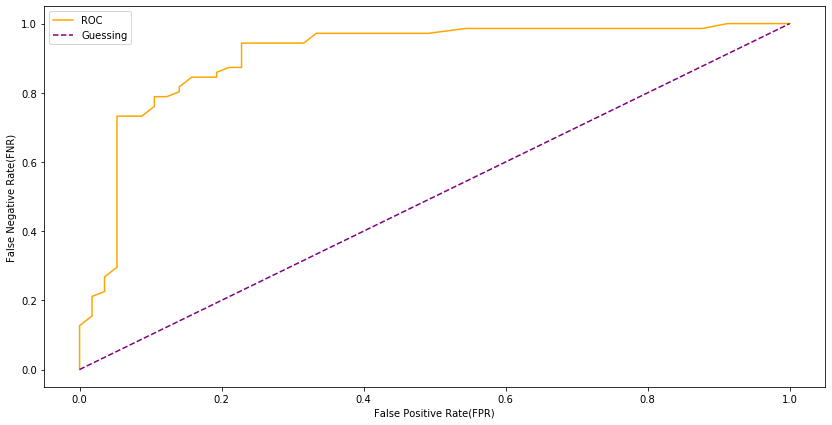

In [60]:
y_probs_positive = y_probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

fig, ax = plt.subplots(1,1, figsize=(14,7))
ax.plot(fpr, tpr, color="orange", label="ROC")
ax.plot([0,1], [0,1], color="purple", linestyle="--",  label="Guessing")
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("False Negative Rate(FNR)")
plt.legend()
plt.show()

In [61]:
print(fpr)

[0.         0.         0.         0.         0.         0.01754386
 0.01754386 0.01754386 0.03508772 0.03508772 0.05263158 0.05263158
 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158 0.05263158
 0.0877193  0.10526316 0.10526316 0.12280702 0.14035088 0.14035088
 0.15789474 0.19298246 0.19298246 0.21052632 0.22807018 0.22807018
 0.22807018 0.26315789 0.28070175 0.31578947 0.33333333 0.42105263
 0.49122807 0.54385965 0.57894737 0.59649123 0.66666667 0.68421053
 0.73684211 0.8245614  0.85964912 0.87719298 0.9122807  0.92982456
 0.96491228 1.        ]


In [62]:
#AUC -> Area Under Curve
roc_auc_score(y_test, y_probs_positive)


0.9083271559179639

__Confusion Matrix__

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In [63]:
y_preds = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
pd.crosstab(y_test, y_preds, rownames=["Actual Labels"],
            colnames=["Prediction Labels"])

Prediction Labels,0,1
Actual Labels,,
0,49,8
1,13,58


[]

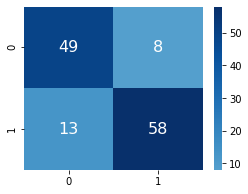

In [64]:
plt.figure(figsize = (4,3))
sns.heatmap(conf_mat, center=0,  
            cmap="Blues", annot_kws={"size":16}, annot=True )
plt.plot()

__Classification Report__

Precision - Indicates the porportion of positive identifications(model predicted class1) which were actually correct. A model which produces no false positives has a precision of 1.0  
Recall - Indicaes proportion of actual positives which were correctly clasisfied. A model which produces no false negatives has a recall of 1.0  
F1 Score - A combiation of precision and recall. A perfect model achieves an F1 Score of 1.0  
Support - THe number of samples each metric was calculated on
Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.


In [67]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        57
           1       0.88      0.82      0.85        71

    accuracy                           0.84       128
   macro avg       0.83      0.84      0.84       128
weighted avg       0.84      0.84      0.84       128



**Where the precision and recall become valuable**

In [69]:
disease_true = np.zeros(1000)
disease_true[0] = 1
disease_preds = np.zeros(1000)
pd.DataFrame(classification_report(disease_true, disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


Accuracy in this case is 0.99, but it just because there is a large imbalance

### Regression model evaluation metrics

1. R^2 or coefficent of determination.  
R-squared: compares your models predictions to the mean of the targets. Values can range from negative infinity to 1. For example, if all your model does is predict the mean of the target, itś R^2 values would be 0. And if your model perfeclty predicts a range of numbers it's R² value would be 1.

2. Mean Absolute error (MAE)

3. Mean square error (MSE)


In [90]:
np.random.seed(42)
X = boston_df.drop(["target"], axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

### R²
sc = model.score(X_test, y_test)
print(sc)
y_test_mean = np.full(len(y_test), y_test.mean())
y_preds = model.predict(X_test)
print(y_test.mean())

0.873969014117403
21.488235294117644


In [86]:
r2_score(y_test, y_test_mean)

0.0

In [87]:
r2_score(y_test, y_test)

1.0

In [89]:
r2_score(y_test, y_preds)

0.8739690141174031

In [93]:
#mean absolute error

mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [106]:
df = pd.DataFrame(data={"actual values": y_test,
                      "predicted values": y_preds})
df["differences"] = abs(df["predicted values"] - df["actual values"])
df["squared_differences"] = df["differences"] ** 2

In [108]:
print(df["differences"].mean())
print(df["squared_differences"].mean())

2.1226372549019623
9.242328990196082


In [105]:
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, he closeyour R^2 is to 1.0 the better the model. But it doesn really tell exactyl how wrong your model is in terms of how far off eac prediction is.
MAE gives a better indication of how far off each of your modelś prediciton are on average. As for mse, quaring the differences between predicted values and actual values, it amplifies larger differences.


### Conclusion

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being \\$10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being \\$10,000 off is more than twice as bad as being \\$5,000 off.

### Using the `scoring` parameter 

In [121]:
np.random.seed(42)
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
cv_acc= cross_val_score(clf, X, y, cv=5)
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f} %")

The cross-validated accuracy is: 82.15 %


In [122]:
#should be the same result
np.random.seed(42)
cv_acc= cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f} %")

The cross-validated accuracy is: 82.48 %


In [123]:
np.random.seed(42)
cv_acc= cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f} %")

The cross-validated accuracy is: 83.30 %


In [125]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(np.mean(cv_recall))

0.8424242424242424


In [127]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.841476533416832

In [134]:
np.random.seed(42)
X = boston_df.drop("target",axis=1)
y = boston_df["target"]

model = RandomForestRegressor(n_estimators=100)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [136]:
cv_r2 = cross_val_score(model, X, y, cv=5, scoring= "r2")
print(cv_r2)
cv_mae = cross_val_score(model, X, y, cv=5, scoring= "neg_mean_absolute_error")
print(cv_mae)

[0.77488664 0.85978021 0.7593916  0.47325    0.28158931]
[-2.03943137 -2.56209901 -3.36807921 -3.82946535 -3.2339901 ]


In [137]:
cv_mse = cross_val_score(model, X, y, cv=5, scoring= "neg_mean_squared_error")
print(cv_mse)

[ -8.30964437 -12.73640845 -20.79058856 -46.53944422 -19.15980137]


## Improving a machine learning model

First predicitons = baseline predictions.
First model = baseline model.

From a data perspective:
* Could we collect more data? (Generally, the more data, the better)
* Could we improve our data?

From a model perspective:
* Is there a better model we could use?
* Could we imporve the current model?

Parameters --> model finds these patterns in data  
Hyperparameters --> settings on a model you can adjust to (potentially) improve the metrics of your model.

There are three ways to adjust hyperparamters:
1. By hand
2. Randomly (RandomSearchCV)
3. Exhaustively with GridSearchCV


## 5.1 Tuning hyperparameters by ha.d
We are going to try and adjust:

    *`max_depth`
    *`max_features`
    *`min_samples_leaf`
    *`max_samples_split`
    *`n_estimators`


In [159]:
validation

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [169]:
def evaluate_preds(y_true, y_preds):
    accur = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {"accuracy": round(accur,2),
                  "precision": round(precision,2),
                  "recall": round(recall,2),
                  "f1": round(f1,2)}
    return metric_dict

In [175]:
np.random.seed(42)
heart_disease_shuffled = heart_disease.sample(frac=1)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
train_split = round(0.7 *len(heart_disease_shuffled))
validation_split = round(train_split + 0.15*len(heart_disease_shuffled))

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:validation_split], y[train_split:validation_split]
X_test, y_test = X[validation_split:], y[validation_split:]

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
print(baseline_metrics)

{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}


In [176]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [180]:
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
print(baseline_metrics)

{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}


In [182]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)
clf.fit(X_train,y_train)
y_preds = clf.predict(X_valid)

baseline_metrics = evaluate_preds(y_valid, y_preds)
print(baseline_metrics)

{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1': 0.82}


#### Using RandomizedSearchCV

In [188]:
np.random.seed(42)
grid = {"n_estimators": [10,100,200,500, 1000,1200],
        "max_depth": [None,10,20,30],
        "max_features":["auto", "sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf":[1,2,4]}


X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid,
                            n_iter=10, cv=5, verbose=2)
#Fi the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.6s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.5s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=500, min_samples_split=2, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   55.0s finished
/home/serra/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=1, o

In [189]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 20}